# Aplicación de algoritmos de clustering particional

## Tarea 3.1: Realiza el pre-procesamiento necesario para poder aplicar algoritmos de clustering particional 

Ya tenemos el preproceso hecho del notebook anterior, pero hay algo que para estos algoritmos vendría bien y no hems realizado. Ya estos son muy sensibles a valores atípicos, los eliminaremos por medio de un estadístico antes de comenzar, pues el agrupamiento podría ser dificil de otra manera

In [4]:
import pandas as pd

In [5]:
df = pd.read_pickle("Accidentes_limpio.pkl")

In [6]:
df

,num_expediente,coordenada_x_utm,coordenada_y_utm,positiva_droga,hour,minuto,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,...,lesividad_Atención en urgencias sin posterior ingreso,lesividad_Desconocido,lesividad_Ingreso inferior o igual a 24 horas,lesividad_Ingreso superior a 24 horas,lesividad_Sin asistencia sanitaria,positiva_alcohol_Desconocido,positiva_alcohol_N,positiva_alcohol_S,mes,dia
0,2.694988,0.817809,1.700384,0.0,0.031657,-0.995377,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.557331,-1.315997
1,2.694988,0.817809,1.700384,0.0,0.031657,-0.995377,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.557331,-1.315997
2,2.698321,-0.554226,0.130121,0.0,0.031657,-1.225625,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.210935,-0.059889
3,2.698321,-0.554226,0.130121,0.0,0.031657,-1.225625,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.210935,-0.059889
4,2.698436,-0.550216,0.268400,0.0,-0.662771,0.789049,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.210935,0.282686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40160,1.584919,-0.174983,0.898062,0.0,0.552478,-1.225625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.560238,0.282686
40161,1.718808,-0.798843,0.289481,0.0,-2.051628,-1.513436,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.560238,-0.516656
40162,1.718808,-0.798843,0.289481,0.0,-2.051628,-1.513436,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.560238,-0.516656
40163,1.718808,-0.798843,0.289481,0.0,-2.051628,-1.513436,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.560238,-0.516656


In [7]:
percentile_10 = df.quantile(0.02)
percentile_90 = df.quantile(0.98)
df_filtered = df[(df >= percentile_10) & (df <= percentile_90)].dropna()

In [8]:
df_filtered

,num_expediente,coordenada_x_utm,coordenada_y_utm,positiva_droga,hour,minuto,distrito_ARGANZUELA,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,...,lesividad_Atención en urgencias sin posterior ingreso,lesividad_Desconocido,lesividad_Ingreso inferior o igual a 24 horas,lesividad_Ingreso superior a 24 horas,lesividad_Sin asistencia sanitaria,positiva_alcohol_Desconocido,positiva_alcohol_N,positiva_alcohol_S,mes,dia
818,-1.873775,-0.831211,-0.182326,0.0,1.246906,-1.513436,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.557331,-0.973422
819,-1.873775,-0.831211,-0.182326,0.0,1.246906,-1.513436,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.557331,-0.973422
822,-1.873430,-1.381170,-0.728417,0.0,0.031657,1.364670,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.557331,-0.859231
826,-1.873086,-1.729192,-1.563867,0.0,0.552478,0.213428,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.557331,-0.859231
827,-1.873086,-1.729192,-1.563867,0.0,0.552478,0.213428,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.557331,-0.859231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39367,1.493208,-0.719214,0.148441,0.0,0.899692,1.076860,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.560238,1.196219
39368,1.493208,-0.719214,0.148441,0.0,0.899692,1.076860,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.560238,1.196219
39369,1.493323,-1.561626,1.517183,0.0,1.073299,0.501238,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.560238,1.196219
39371,1.493438,-0.440797,-0.416724,0.0,1.073299,-0.477318,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.560238,1.196219


Tomamos unos percentiles tan bajos como estos porque los datos al parecer están muy en los extremos, si cogieramos si quiera el percentil 5 y 95, no tendríamos datos, asique con esta reducción será suficiente para ayudar el correcto funcionamiento del algoritmo.

## Tarea 3.2: Establece el número más adecuado de clusters para el dataset proporcionado. Ayudate de los metodos vistos (al menos 2) en la asignatura, asi como de gráficas para justificar la decisión. Compara los resultados que obtienes con cada métododo.

Para maximizar nuestras probabilidades de encontrar el número de clusters correcto, emplearemos tanto los dendrogramas, como el método GAP y de codo.

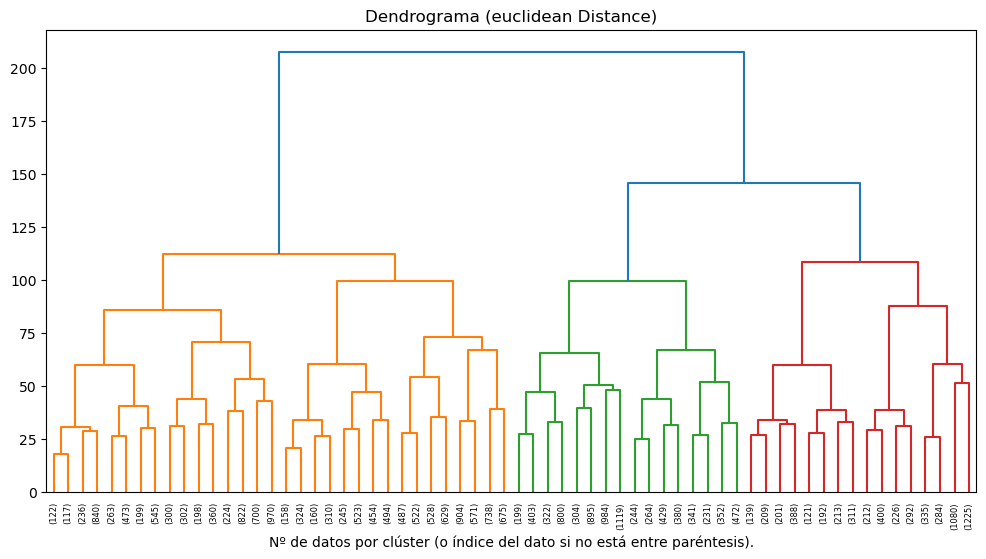

In [12]:
# Dendrograma

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# Generamos la matriz de distancias para el dendrograma
dist_matrix = pdist(df_filtered, metric:="euclidean")
linkage_matrix = linkage(dist_matrix, method="ward")


# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title(f"Dendrograma ({metric} Distance)")
plt.xlabel("Nº de datos por clúster (o índice del dato si no está entre paréntesis).")
plt.show()

El dendrograma no deja nada muy claro; a simple vista podríamos diferenciar entre 10 y 21 clusters, los cuales nos parecen algo excesivos teniendo en cuenta los 2 con los que concluimos la parte anterior.

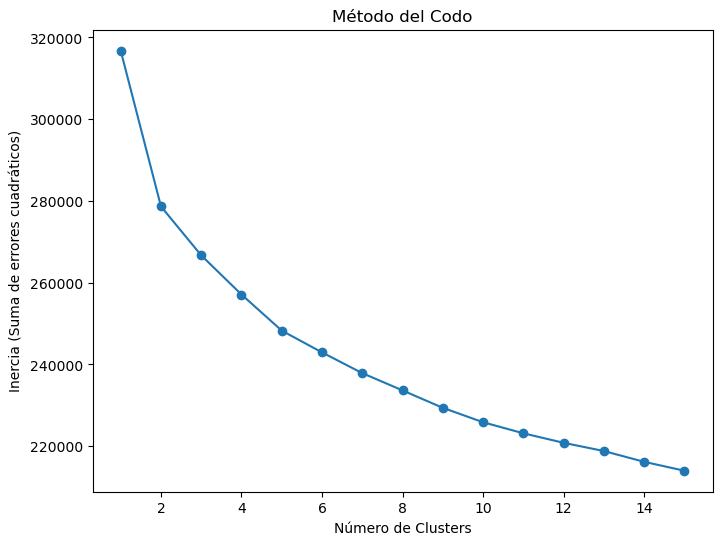

In [14]:
# Diagrama de codo

from sklearn.cluster import KMeans

# Probamos diferente numero de clusters
inertia = []
k_range = range(1, 16)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_filtered)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia (Suma de errores cuadráticos)")
plt.show()

Podemos notar una bajada drástica en la puntuación en 2 clusters, luego por el método del codo podríamos decir que 2 es el número de clusters que más se adecúa a nuestros datos

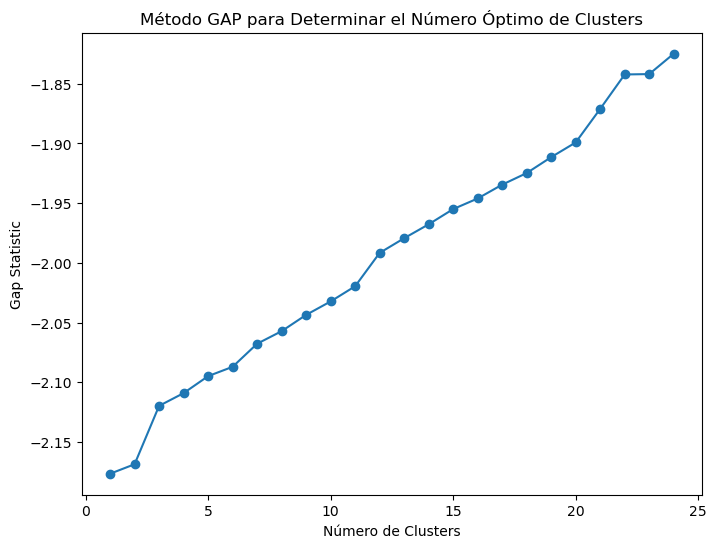

In [16]:
# Método GAP

import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min

def gap_statistic(X, n_refs=20, max_k=25):
    """
    Calcula el Gap Statistic para determinar el número óptimo de clusters.
    X: Datos de entrada (numpy array o DataFrame)
    n_refs: Número de datasets aleatorios generados
    max_k: Máximo número de clusters a probar
    """
    # Escalar los datos
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    gaps = np.zeros(max_k - 1)
    for k in range(1, max_k):
        # Calcular el logaritmo de la inercia para los datos reales
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        log_wk = np.log(kmeans.inertia_)

        # Crear referencias aleatorias y calcular su inercia
        reference_inertias = np.zeros(n_refs)
        for i in range(n_refs):
            random_data = np.random.rand(*X_scaled.shape)
            kmeans_ref = KMeans(n_clusters=k, random_state=42)
            kmeans_ref.fit(random_data)
            reference_inertias[i] = np.log(kmeans_ref.inertia_)

        # Calcular el Gap Statistic
        gap = np.mean(reference_inertias) - log_wk
        gaps[k - 1] = gap

    return gaps

gaps = gap_statistic(df_filtered)

# Graficar el Gap Statistic
plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), gaps, marker='o')
plt.title("Método GAP para Determinar el Número Óptimo de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Gap Statistic")
plt.show()

De forma similar pero contraria al método del codo, GAP nos muestra un ascenso inigualado de dos a tres, luego podríamos decir que según GAP, la mejor distribución de valores sería entre 3 grupos distintos

Como conclusión diremos que un número bajo de clusters, tres, para ser exactos, sería la mejor separación posible de los datos, tal y como nos dictan el método del codo y el gap.

## Tarea 3.3 ¿Cómo varía la calidad del clustering con diferentes valores de 'k'?

In [20]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

def plot_Kmeans_indices(df, modelo=None):
    """
    Calcula y plotea los índices de calidad de Calinski-Harabasz, Davies Bouldin y Silueta para diferentes números de clusters usando KMeans.
    """
    
    # Rango de clusters
    n_clusters_range = range(2, 11)
    calinski_scores = []
    davies_scores = []
    silhouette_scores = []

    # Crear el modelo KMeans
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(df)
        labels = kmeans.labels_

        # Calculamos índices
        calinski = calinski_harabasz_score(df, labels)
        davies = davies_bouldin_score(df, labels)
        silhouette = silhouette_score(df, labels)

        calinski_scores.append(calinski)
        davies_scores.append(davies)
        silhouette_scores.append(silhouette)

    # Graficamos los índices
    plt.figure(figsize=(18, 5))

    # Índice de Calinski-Harabasz
    plt.subplot(1, 3, 1)
    plt.plot(n_clusters_range, calinski_scores, marker='o', label='Calinski-Harabasz')
    plt.title('Índice de Calinski-Harabasz')
    plt.xlabel('Número de clusters')
    plt.ylabel('Puntaje')
    plt.grid(True)

    # Índice de Davies-Bouldin
    plt.subplot(1, 3, 2)
    plt.plot(n_clusters_range, davies_scores, marker='o', label='Davies-Bouldin', color='orange')
    plt.title('Índice de Davies-Bouldin')
    plt.xlabel('Número de clusters')
    plt.ylabel('Puntaje')
    plt.grid(True)

    # Índice de Silhouette
    plt.subplot(1, 3, 3)
    plt.plot(n_clusters_range, silhouette_scores, marker='o', label='Silhouette', color='green')
    plt.title('Índice de Silhouette')
    plt.xlabel('Número de clusters')
    plt.ylabel('Puntaje')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

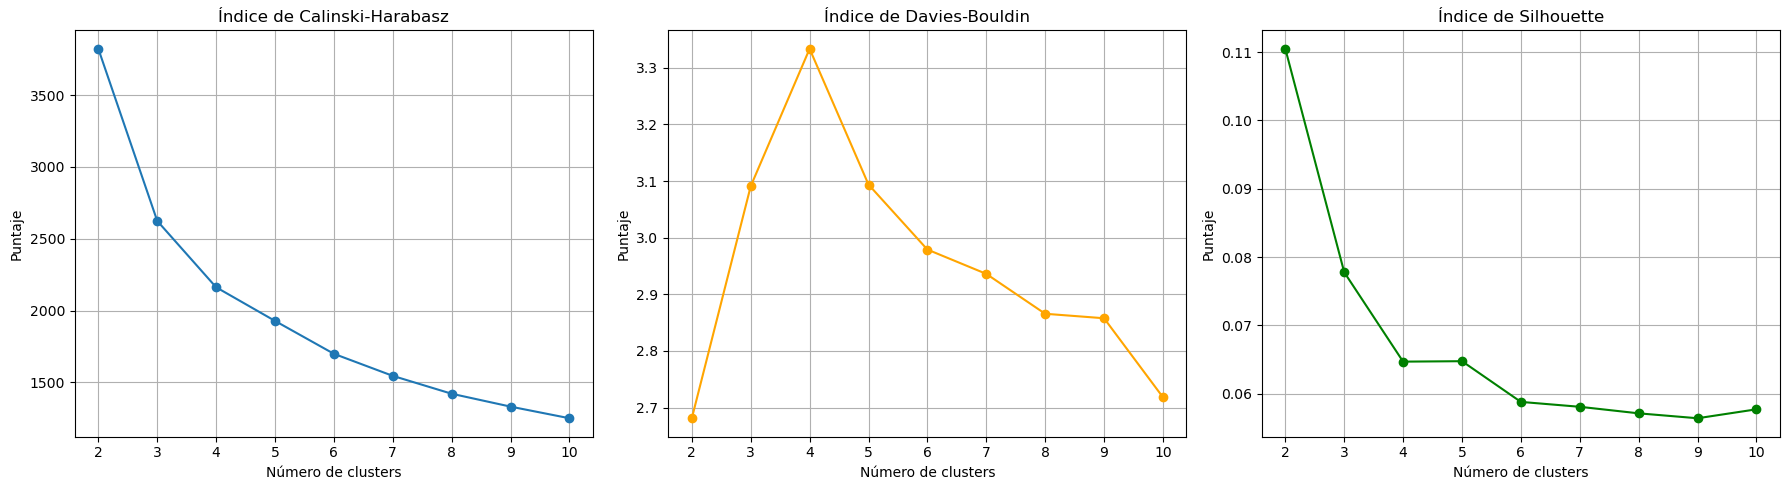

In [21]:
plot_Kmeans_indices(df_filtered)

Como podemos observar, el algoritmo funciona mejor con indices bajos, con un rango entre el 2 y el 4, siendo el 3 el que mejor media tiene en estas métricas, lo que refuerza nuestra teoría de 3 clusters siendo el número más adecuado que hay.

Cabe destacar que con todos los números de clusters el índice de silueta es extremadamente bajos, lo cual solo aumenta según sube el número de estos. Esto podría significar que el algoritmo no está entendiendo los datos o que los grupos que se forman no están muy densos o separados entre sí.

## Tarea 3.4: Con el número más adecuado de clusters, ayúdate de estadísticas para analizar a los viajeros incluidos en cada cluster.

In [67]:
df_raw = pd.read_csv("Accidentalidad_raw.csv")
df_raw.drop("Unnamed: 0", axis=1, inplace=True)

In [69]:
# Agregar la información del cluster al DataFrame
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_filtered)
df_filtered['Cluster'] = clusters

# Contar los datos en cada cluster
cluster_counts = df_filtered['Cluster'].value_counts()
print("Datos por cluster:")
print(cluster_counts)

Datos por cluster:
Cluster
2    11329
1     8353
0     8278
Name: count, dtype: int64


In [71]:
import pandas as pd

# Crear un diccionario para guardar los elementos y dataframes
elementos = {}
raw_dfs = []

# Agrupamos por la columna 'Cluster'
for cluster_id, group in df_filtered.groupby('Cluster'):
    # Guardar los elementos del cluster en una lista
    raw = group.index.tolist()  # indices de las filas
    raw_df = df_raw.iloc[raw]
    raw_dfs.append(raw_df)

In [73]:
raw_dfs[0]

,num_expediente,fecha,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,hour,minuto
12083,12185,2024-04-02,CENTRO,Colisión lateral,Despejado,Autobús,Conductor,De 45 a 49 años,Hombre,Sin asistencia sanitaria,439175.0,4473937.0,N,0.0,19,0
12390,12378,2024-04-04,CENTRO,Atropello a persona,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,Sin asistencia sanitaria,439972.0,4473052.0,N,0.0,19,0
12391,12378,2024-04-04,CENTRO,Atropello a persona,Despejado,Turismo,Peatón,De 55 a 59 años,Hombre,Ingreso inferior o igual a 24 horas,439972.0,4473052.0,N,0.0,19,0
12419,12394,2024-04-04,CARABANCHEL,Colisión fronto-lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,Atención en urgencias sin posterior ingreso,438387.0,4470862.0,N,0.0,21,0
12420,12394,2024-04-04,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 65 a 69 años,Hombre,Sin asistencia sanitaria,438387.0,4470862.0,N,0.0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39362,29821,2024-10-26,CHAMARTÍN,Caída,Despejado,Motocicleta hasta 125cc,Conductor,De 25 a 29 años,Hombre,Sin asistencia sanitaria,442248.0,4476901.0,N,0.0,15,0
39363,29822,2024-10-26,CENTRO,Choque contra obstáculo fijo,Se desconoce,Furgoneta,Conductor,De 40 a 44 años,Hombre,Desconocido,440615.0,4473262.0,N,0.0,19,5
39364,29822,2024-10-26,CENTRO,Choque contra obstáculo fijo,Se desconoce,Turismo,Conductor,Desconocido,Desconocido,Desconocido,440615.0,4473262.0,N,0.0,19,5
39371,29825,2024-10-26,ARGANZUELA,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Hombre,Sin asistencia sanitaria,440519.0,4472991.0,N,0.0,20,18



--- Gráficos del dataframe: DataFrame 1 ---



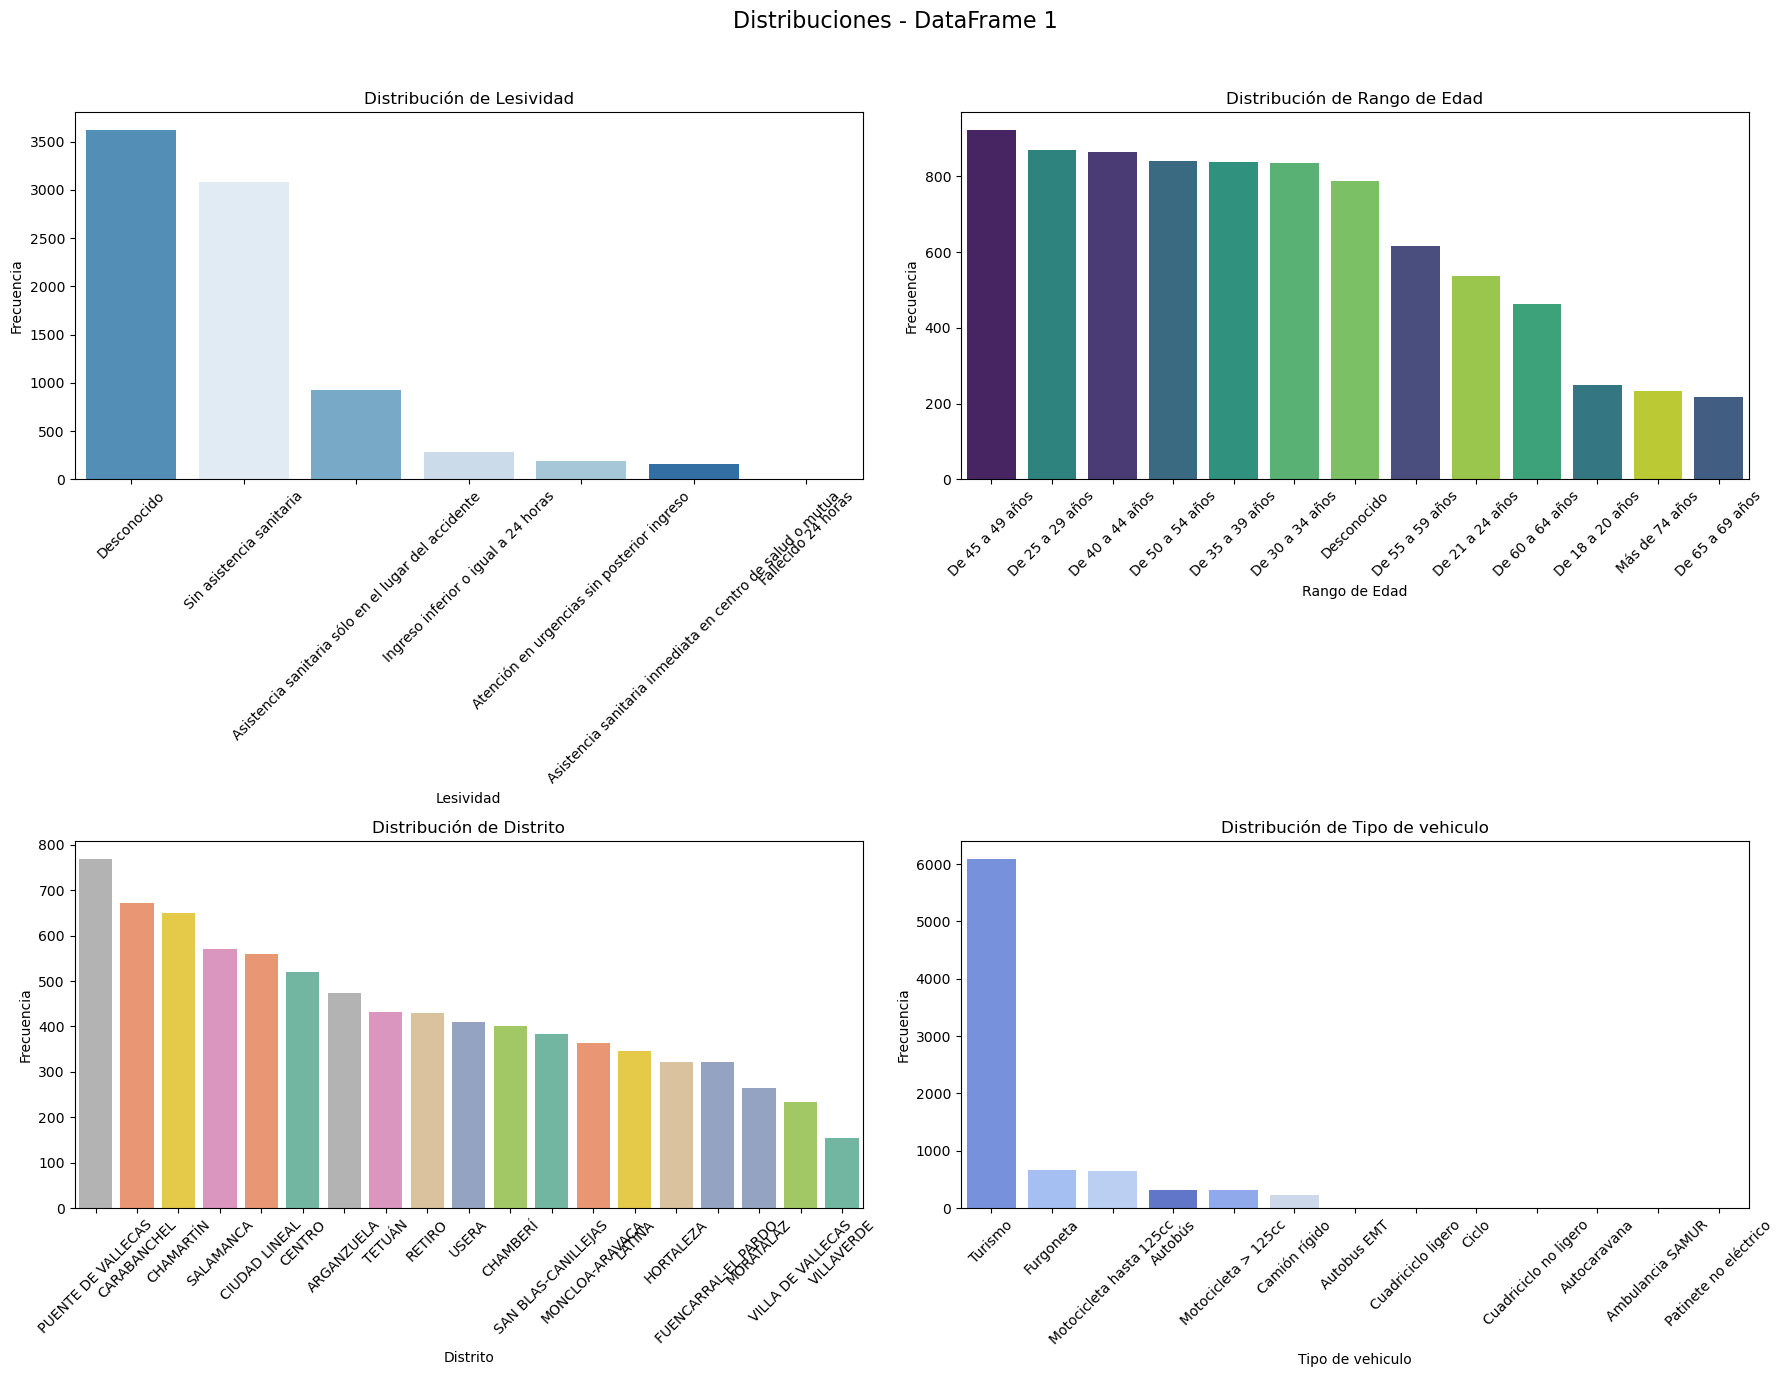


--- Gráficos del dataframe: DataFrame 2 ---



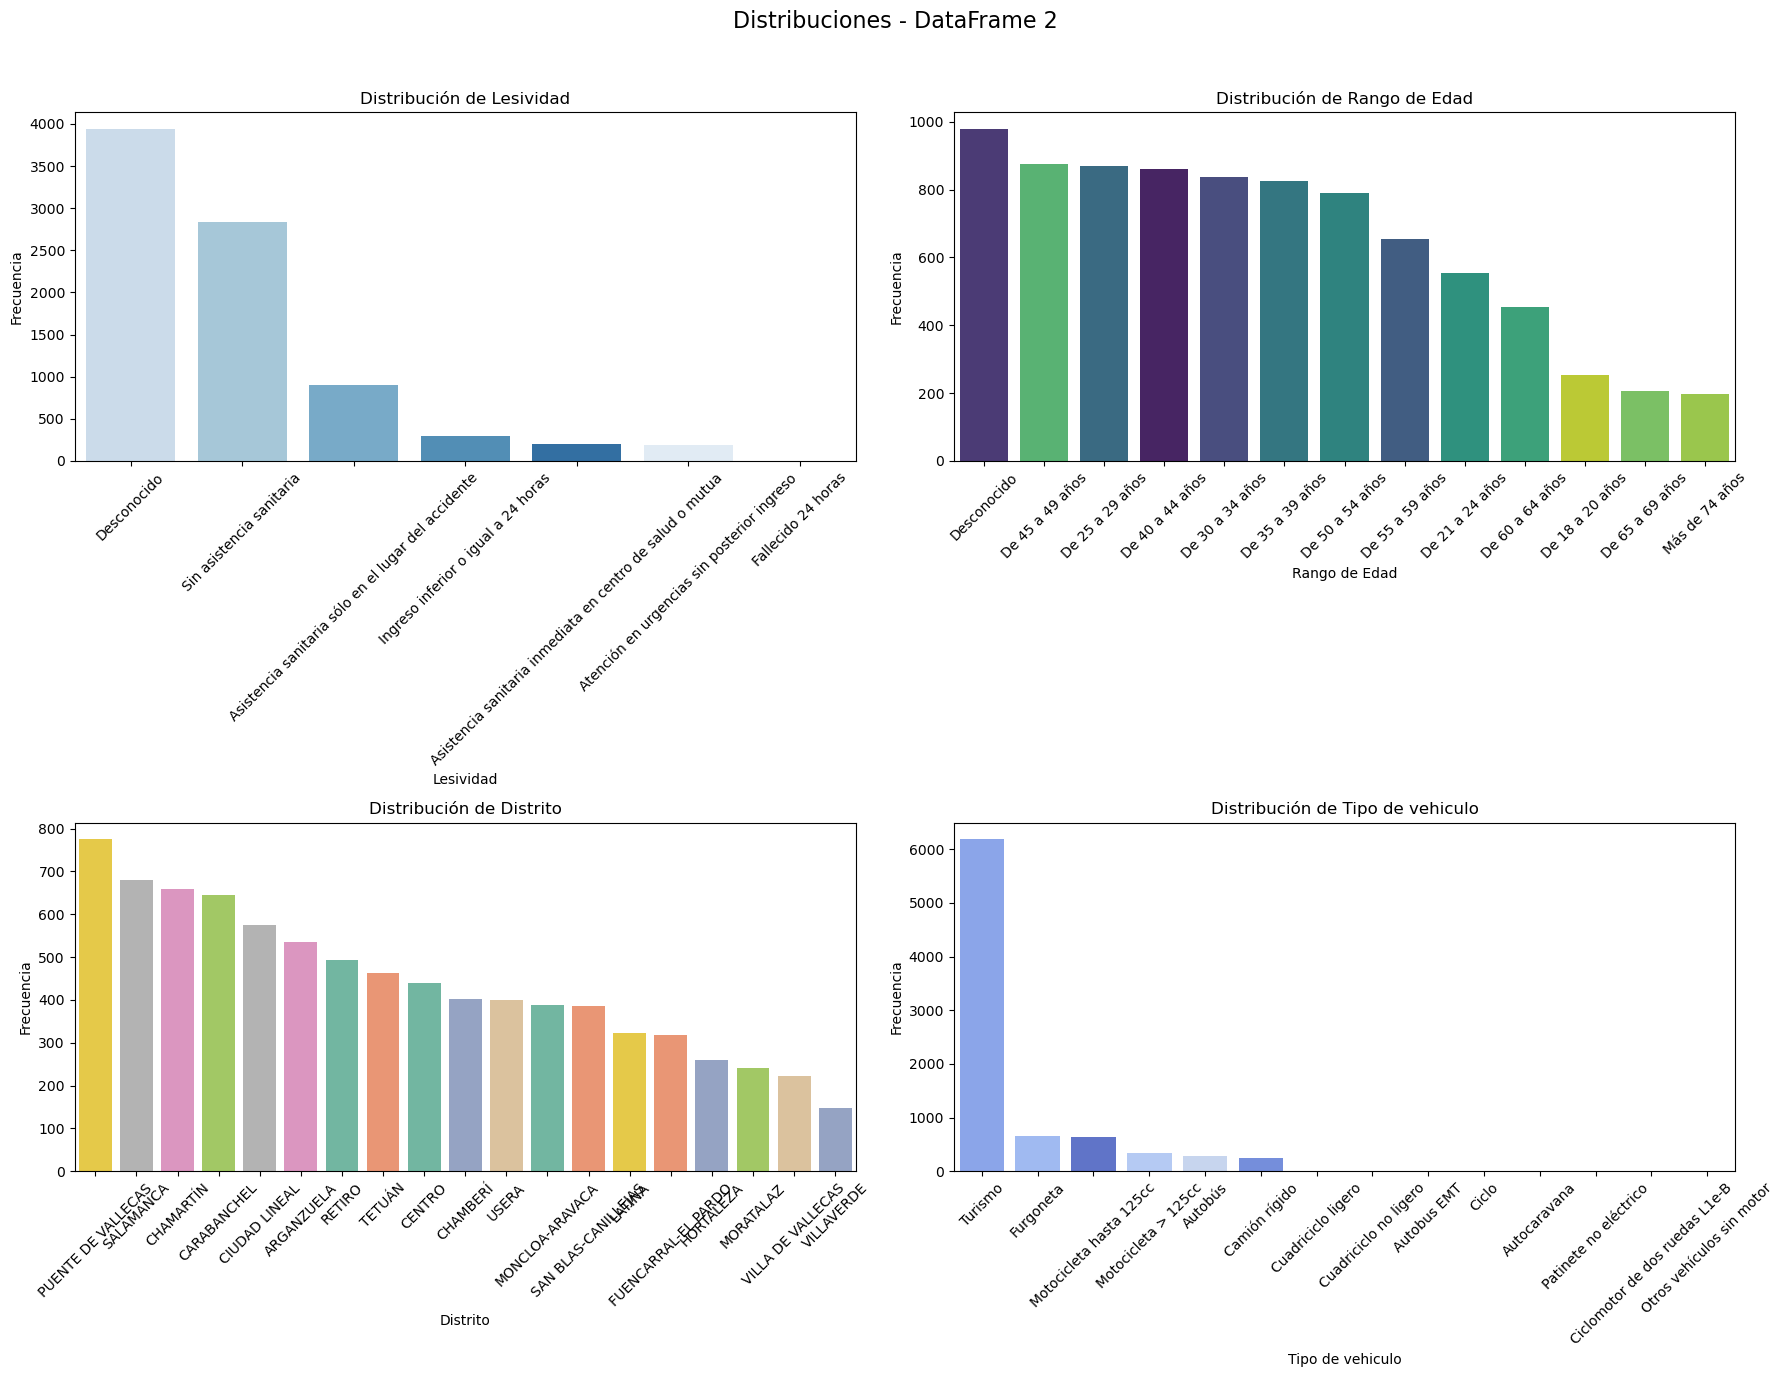


--- Gráficos del dataframe: DataFrame 3 ---



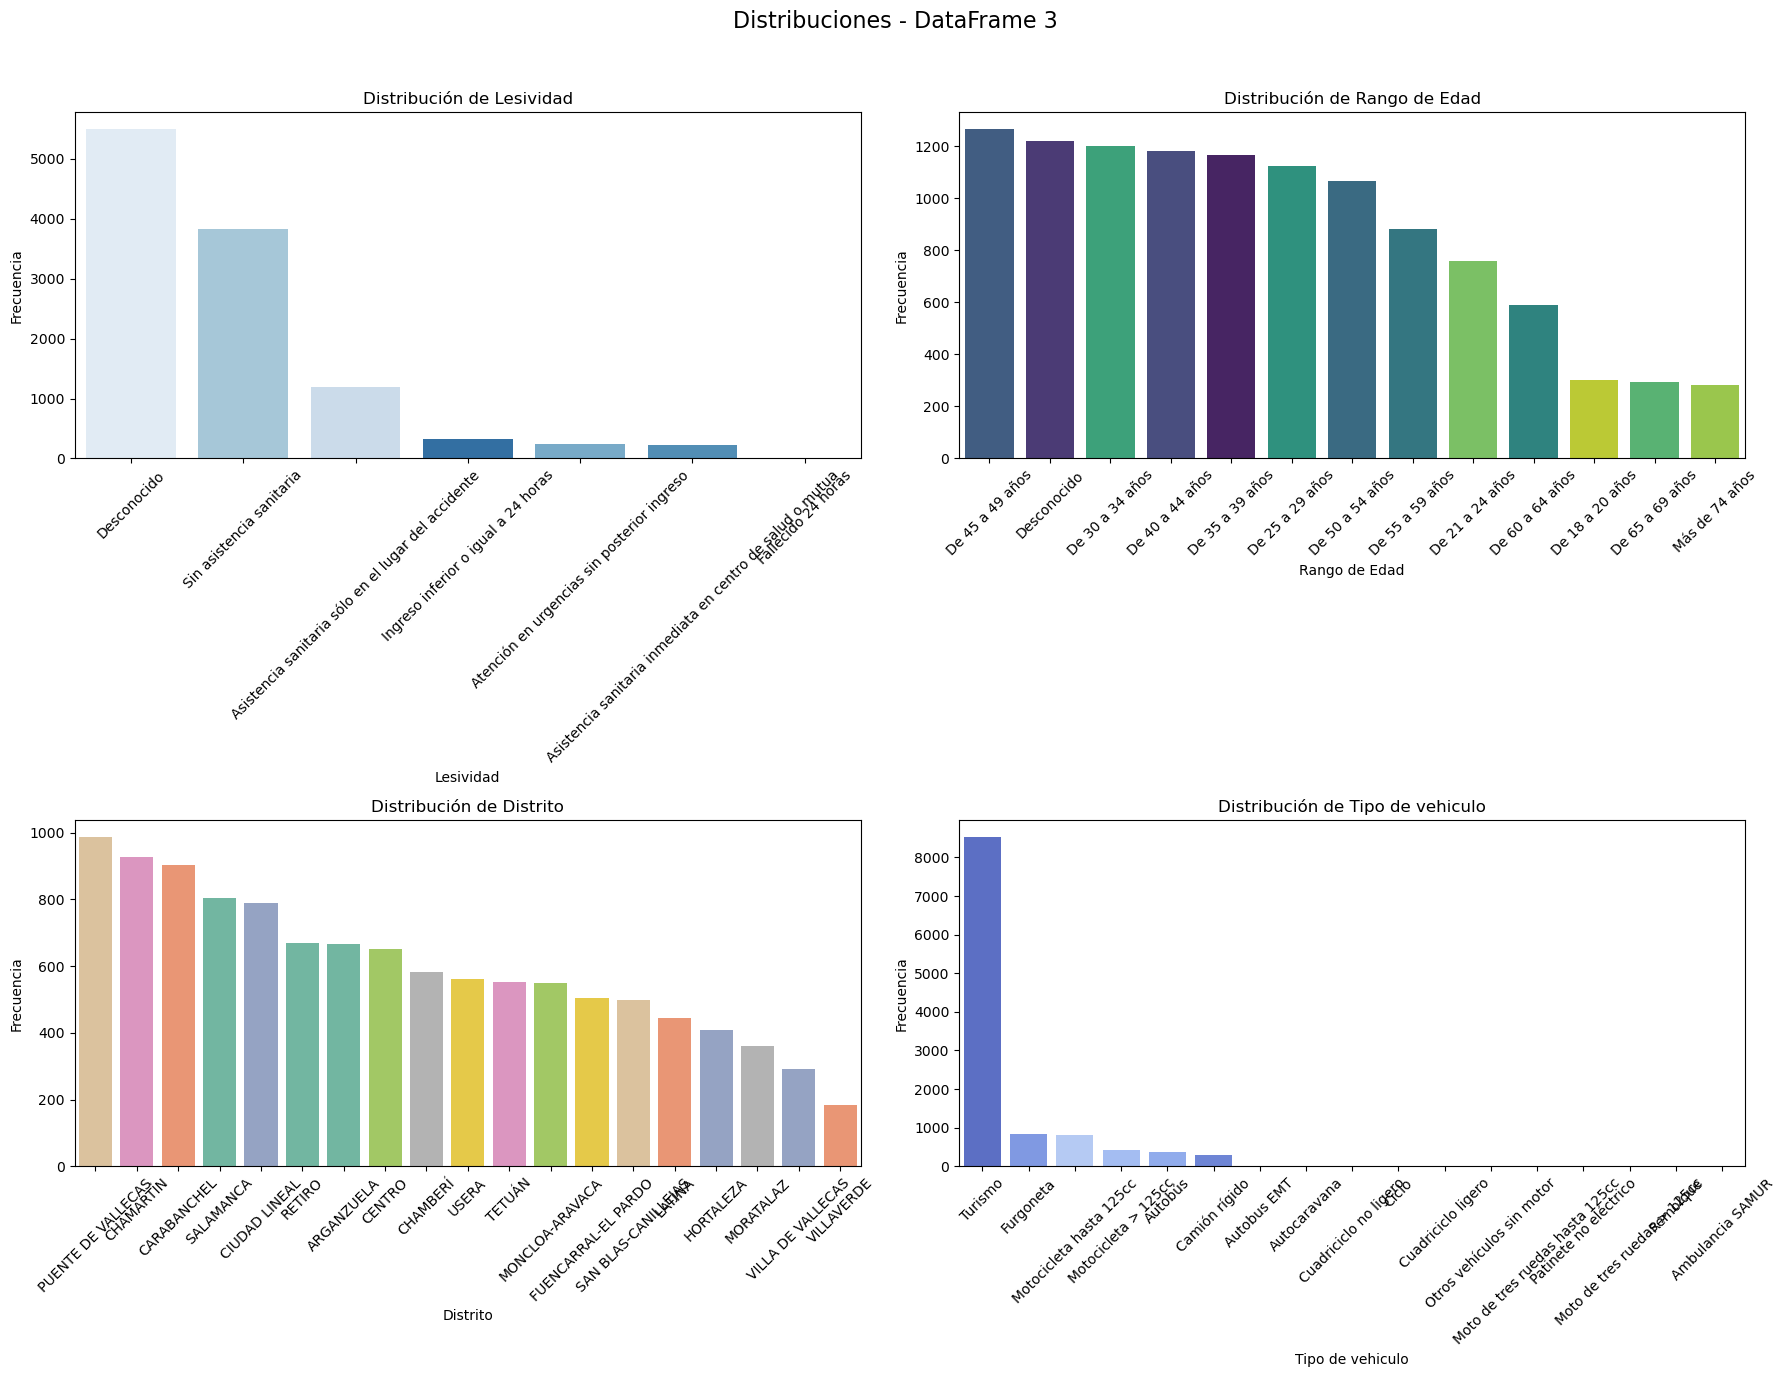

In [99]:
import seaborn as sns

def plot_graphs(df, df_name):
    print(f"\n--- Gráficos del dataframe: {df_name} ---\n")
    
    # Crear una figura con subplots (2 filas y 2 columnas)
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle(f"Distribuciones - {df_name}", fontsize=16)
    
    # Definir una paleta de colores personalizada (puedes elegir cualquier paleta de seaborn o crear una lista de colores)
    color_palette = sns.color_palette("Blues", n_colors=len(df['lesividad'].value_counts()))

    # 1. Gráfico de barras para 'lesividad'
    order_lesividad = df['lesividad'].value_counts().index
    sns.countplot(data=df, x='lesividad', ax=axes[0, 0], order=order_lesividad, hue='lesividad', palette=color_palette, legend=False)
    axes[0, 0].set_title('Distribución de Lesividad')
    axes[0, 0].set_xlabel('Lesividad')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Gráfico de barras para 'rango_edad'
    order_rango_edad = df['rango_edad'].value_counts().index
    sns.countplot(data=df, x='rango_edad', ax=axes[0, 1], order=order_rango_edad, hue='rango_edad', palette="viridis", legend=False)
    axes[0, 1].set_title('Distribución de Rango de Edad')
    axes[0, 1].set_xlabel('Rango de Edad')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Gráfico de barras para 'distrito'
    order_distrito = df['distrito'].value_counts().index
    sns.countplot(data=df, x='distrito', ax=axes[1, 0], order=order_distrito, hue='distrito', palette="Set2", legend=False)
    axes[1, 0].set_title('Distribución de Distrito')
    axes[1, 0].set_xlabel('Distrito')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # 4. Gráfico de barras para 'tipo_vehiculo'
    order_tipo_accidente = df['tipo_vehiculo'].value_counts().index
    sns.countplot(data=df, x='tipo_vehiculo', ax=axes[1, 1], order=order_tipo_accidente, hue='tipo_vehiculo', palette="coolwarm", legend=False)
    axes[1, 1].set_title('Distribución de Tipo de vehiculo')
    axes[1, 1].set_xlabel('Tipo de vehiculo')
    axes[1, 1].set_ylabel('Frecuencia')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para no solaparse con el título
    plt.show()

# Aplicar la función de gráficos a cada dataframe
for i, df in enumerate(raw_dfs):
    plot_graphs(df, f"DataFrame {i+1}")



Podemos observar que los primeros elementos de todos los clusters son siempre parecidos; los vehiculos son turismos, los accidentes son en puente de vallecas, el rango de edad o indeterminado o 45 años... Luego es probable que para la agrupación se estén usando otros elementos que no hemos estudiado, como sus coordenadas, la presencia de estupefacientes, el tipo de persona o el género.

## Tarea 3.5: Compara los resultados obtenidos con K-means y el clustering aglomerativo/jerárquico. Discute las ventajas y desventajas de cáda método en diferentes tipos de datos.

Los resultados son realmente parecidos, pues si vemos las gráficas, las de clustering aglomerativo son casi identicas a las que se generan con K-means. Si miramos Birch, este también nos indica lo mismo, que el número de clusters es bajo (de dos o tres).

- K-means: tiene ventaja en grupos pequeños de datos, siempre y cuando sean densos y de tamaños más o menos parecidos. En este caso, los datos son grandes pero al haberse borrado tantos solamente usando los cuantiles 2 y 98, creemos que los datos están fuertemente dispersos, y de haber grupos, serán pequeños. Otra posible explicación sería que de haber clusters, estos sean de tamaños muy variantes o sean no convexos.
- Jerarquico: al igual que el anterior, son gravemente afectados por el ruido, de ahí que nos salgan resultados tan pobres y un número de clusters tan extraño como 2 o 3. Estos trabajan de forma pobre cuando el número de datos o las dimensiones escalan, por lo que era de esperar un comportamiento débil.